In [53]:
import numpy as np #导入NumPy数学工具箱
import pandas as pd #导入Pandas数据处理工具箱
df_bank = pd.read_csv("../input/bank-customer/BankCustomer.csv") # 读取文件
df_bank.head() # 显示文件前5行

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Male,37,Tianjin,3,2,1,1,634,31937.37,137062,0
1,Xue Baochai,Female,39,Beijing,9,1,1,1,556,18144.95,110194,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129910,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976,1


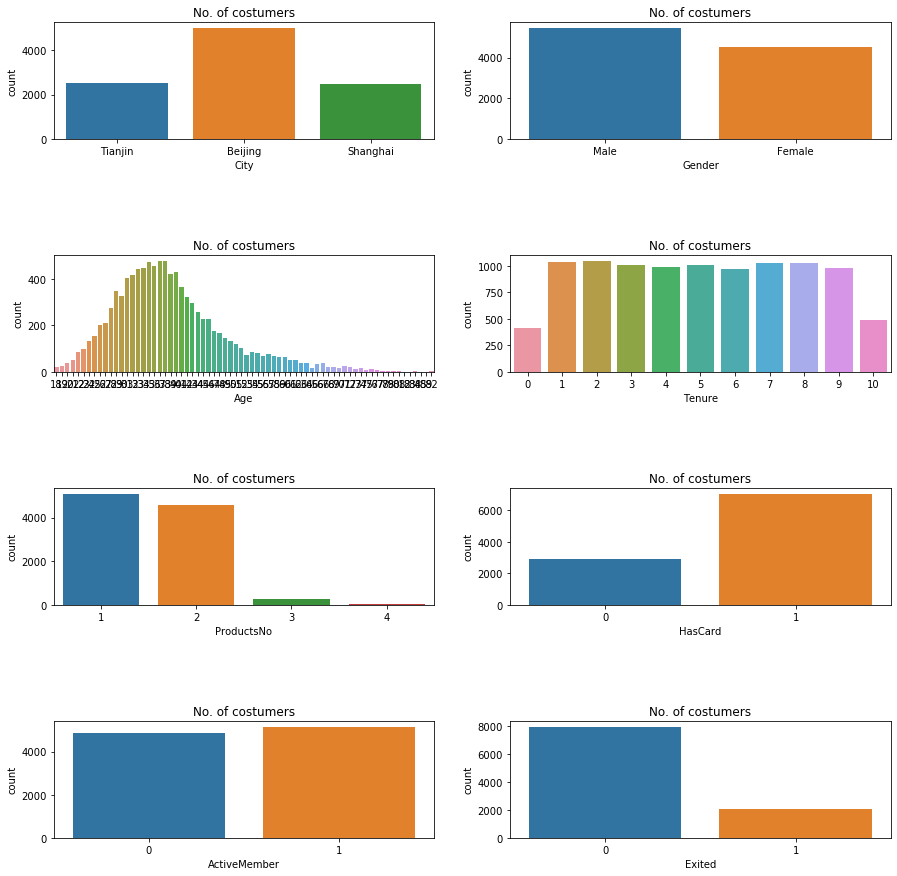

In [55]:
import matplotlib.pyplot as plt #导入matplotlib画图工具箱
import seaborn as sns #导入seaborn画图工具箱
# 显示不同特征的分布情况
features=[ 'City', 'Gender','Age','Tenure', 
           'ProductsNo', 'HasCard', 'ActiveMember', 'Exited']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_bank)
    plt.title("No. of costumers")

In [57]:
# 把二元类别文本数字化
df_bank['Gender'].replace("Female",0,inplace = True)
df_bank['Gender'].replace("Male",1,inplace=True)
# 显示数字类别
print("Gender unique values",df_bank['Gender'].unique())
# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
d_city = pd.get_dummies(df_bank['City'], prefix = "City")
df_bank = [df_bank, d_city]
df_bank = pd.concat(df_bank, axis = 1)
# 构建特征和标签集合
y = df_bank ['Exited']
X = df_bank.drop(['Name', 'Exited','City'], axis=1)
X.head() #显示新的特征集

Gender unique values [1 0]


,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,1,37,3,2,1,1,634,31937.37,137062,0,0,1
1,0,39,9,1,1,1,556,18144.95,110194,1,0,0
2,0,32,9,1,1,1,803,10378.09,236311,1,0,0
3,0,37,0,2,1,1,778,25564.01,129910,0,0,1
4,1,55,4,3,1,0,547,3235.61,136976,0,0,1


In [59]:
from sklearn.model_selection import train_test_split #拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)

In [61]:
from sklearn.linear_model import LogisticRegression # 导入Sklearn模型
lr = LogisticRegression() # 逻辑回归模型
history = lr.fit(X_train,y_train) # 训练机器
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(X_test,y_test)*100))

逻辑回归测试集准确率 78.35%


In [63]:
import keras # 导入Keras库
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
ann = Sequential() # 创建一个序贯ANN(Artifical Neural Network)模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.summary() # 显示网络模型(这个语句不是必须的)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


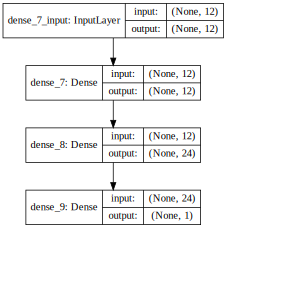

In [64]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(ann,show_shapes = True ).create(prog='dot', format='svg'))

In [65]:
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'adam',           #优化器
            loss = 'binary_crossentropy', #损失函数  
            metrics = ['acc'])       #评估指标

In [67]:
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) #指定验证集,这里为了简化模型，直接用测试集数据进行验证

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 0s 40us/step - loss: 582.7277 - acc: 0.5874 - val_loss: 21.1787 - val_acc: 0.5140
Epoch 2/30
8000/8000 [==============================] - 0s 21us/step - loss: 20.8019 - acc: 0.6504 - val_loss: 15.6053 - val_acc: 0.7085
Epoch 3/30
8000/8000 [==============================] - 0s 21us/step - loss: 19.6293 - acc: 0.6650 - val_loss: 37.3416 - val_acc: 0.7660
Epoch 4/30
8000/8000 [==============================] - 0s 21us/step - loss: 15.5447 - acc: 0.6730 - val_loss: 13.9860 - val_acc: 0.7820
Epoch 5/30
8000/8000 [==============================] - 0s 21us/step - loss: 19.6147 - acc: 0.6755 - val_loss: 19.1928 - val_acc: 0.7875
Epoch 6/30
8000/8000 [==============================] - 0s 21us/step - loss: 25.6364 - acc: 0.6779 - val_loss: 15.0183 - val_acc: 0.5095
Epoch 7/30
8000/8000 [==============================] - 0s 21us/step - loss: 20.6823 - acc: 0.6795 - val_loss: 8.9003 - val_acc: 

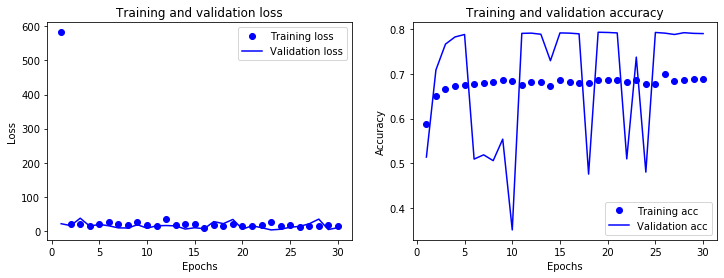

In [69]:
# 这段代码参考《Python深度学习》一书中的学习曲线的实现
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
show_history(history) # 调用这个函数，并将神经网络训练历史数据作为参数输入

In [70]:
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 四舍五入，将分类概率值转换成0/1整数值

In [71]:
from sklearn.metrics import classification_report # 导入分类报告
def show_report(X_test, y_test, y_pred): # 定义一个函数显示分类报告
    if y_test.shape != (2000,1):
        y_test = y_test.values # 把Panda series转换成Numpy array
        y_test = y_test.reshape((len(y_test),1)) # 转换成与y_pred相同的形状 
    print(classification_report(y_test,y_pred,labels=[0, 1])) #调用分类报告   

In [73]:
from sklearn.metrics import confusion_matrix # 导入混淆矩阵
def show_matrix(y_test, y_pred): # 定义一个函数显示混淆矩阵
    cm = confusion_matrix(y_test,y_pred) # 调用混淆矩阵
    plt.title("ANN Confusion Matrix") # 标题
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False) # 热力图设定
    plt.show() # 显示混淆矩阵

**特征缩放（Feature Scaling）**

In [76]:
# mean = X_train.mean(axis=0) # 计算训练集均值
# X_train -= mean # 训练集减去训练集均值
# std = X_train.std(axis=0) # 计算训练集方差
# X_train /= std # 训练集除以训练集标准差
# X_test -= mean # 测试集减去训练集均值
# X_test /= std # 测试集减去训练集均值

In [77]:
from sklearn.preprocessing import StandardScaler # 导入特征缩放器
sc = StandardScaler() # 特征缩放器
X_train = sc.fit_transform(X_train) # 拟合并应用于训练集
X_test = sc.transform (X_test) # 训练集结果应用于测试集

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 逻辑回归模型
history = lr.fit(X_train,y_train) # 训练机器
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(X_test,y_test)*100))

逻辑回归测试集准确率 80.50%


**特征工程后重新调用神经网络**

In [81]:
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) #指定验证集
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 0s 24us/step - loss: 0.4697 - acc: 0.7996 - val_loss: 0.4291 - val_acc: 0.8190
Epoch 2/30
8000/8000 [==============================] - 0s 21us/step - loss: 0.4196 - acc: 0.8195 - val_loss: 0.4116 - val_acc: 0.8265
Epoch 3/30
8000/8000 [==============================] - 0s 21us/step - loss: 0.3992 - acc: 0.8310 - val_loss: 0.3977 - val_acc: 0.8390
Epoch 4/30
8000/8000 [==============================] - 0s 21us/step - loss: 0.3855 - acc: 0.8388 - val_loss: 0.3890 - val_acc: 0.8470
Epoch 5/30
8000/8000 [==============================] - 0s 22us/step - loss: 0.3758 - acc: 0.8435 - val_loss: 0.3835 - val_acc: 0.8480
Epoch 6/30
8000/8000 [==============================] - 0s 21us/step - loss: 0.3692 - acc: 0.8474 - val_loss: 0.3778 - val_acc: 0.8515
Epoch 7/30
8000/8000 [==============================] - 0s 21us/step - loss: 0.3640 - acc: 0.8501 - val_loss: 0.3731 - val_acc: 0.8535
Epoch 8

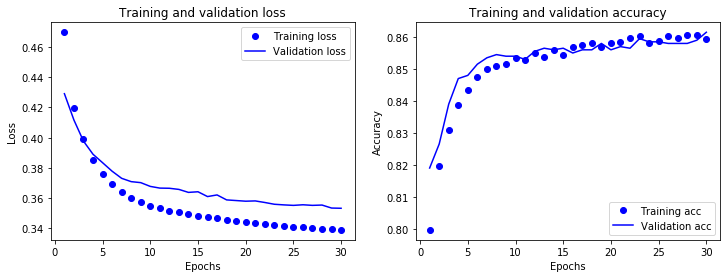

In [82]:
show_history(history)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1583
           1       0.78      0.47      0.58       417

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



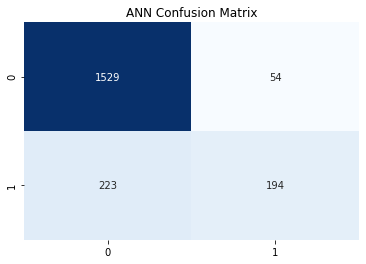

In [83]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

**深层神经网络**

In [85]:
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估指标
ann.compile(optimizer = 'RMSprop', # 优化器
            loss = 'binary_crossentropy', # 损失函数
            metrics = ['acc']) # 评估指标
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) # 指定验证集
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 0s 50us/step - loss: 0.4758 - acc: 0.7956 - val_loss: 0.4554 - val_acc: 0.8040
Epoch 2/30
8000/8000 [==============================] - 0s 28us/step - loss: 0.4346 - acc: 0.8101 - val_loss: 0.4333 - val_acc: 0.8150
Epoch 3/30
8000/8000 [==============================] - 0s 27us/step - loss: 0.4149 - acc: 0.8191 - val_loss: 0.4188 - val_acc: 0.8235
Epoch 4/30
8000/8000 [==============================] - 0s 27us/step - loss: 0.4004 - acc: 0.8271 - val_loss: 0.4098 - val_acc: 0.8315
Epoch 5/30
8000/8000 [==============================] - 0s 28us/step - loss: 0.3830 - acc: 0.8388 - val_loss: 0.3891 - val_acc: 0.8415
Epoch 6/30
8000/8000 [==============================] - 0s 28us/step - loss: 0.3675 - acc: 0.8469 - val_loss: 0.3828 - val_acc: 0.8475
Epoch 7/30
8000/8000 [==============================] - 0s 27us/step - loss: 0.3542 - acc: 0.8539 - val_loss: 0.3718 - val_acc: 0.8485
Epoch 8

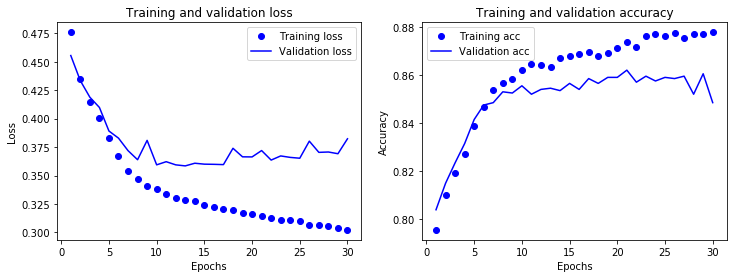

In [86]:
show_history(history)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1583
           1       0.69      0.49      0.58       417

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



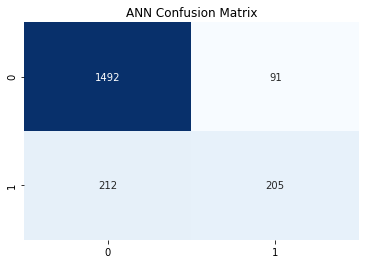

In [87]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

**尝试不同的优化器**

In [88]:
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 0s 58us/step - loss: 0.4993 - acc: 0.7850 - val_loss: 0.4682 - val_acc: 0.7915
Epoch 2/30
8000/8000 [==============================] - 0s 29us/step - loss: 0.4474 - acc: 0.7977 - val_loss: 0.4468 - val_acc: 0.7945
Epoch 3/30
8000/8000 [==============================] - 0s 30us/step - loss: 0.4253 - acc: 0.8164 - val_loss: 0.4285 - val_acc: 0.8275
Epoch 4/30
8000/8000 [==============================] - 0s 30us/step - loss: 0.4116 - acc: 0.8274 - val_loss: 0.4272 - val_acc: 0.8255
Epoch 5/30
8000/8000 [==============================] - 0s 29us/step - loss: 0.4046 - acc: 0.8310 - val_loss: 0.4138 - val_acc: 0.8315
Epoch 6/30
8000/8000 [==============================] - 0s 30us/step - loss: 0.3957 - acc: 0.8344 - val_loss: 0.4123 - val_acc: 0.8315
Epoch 7/30
8000/8000 [==============================] - 0s 30us/step - loss: 0.3910 - acc: 0.8370 - val_loss: 0.4103 - val_acc: 0.8345
Epoch 8

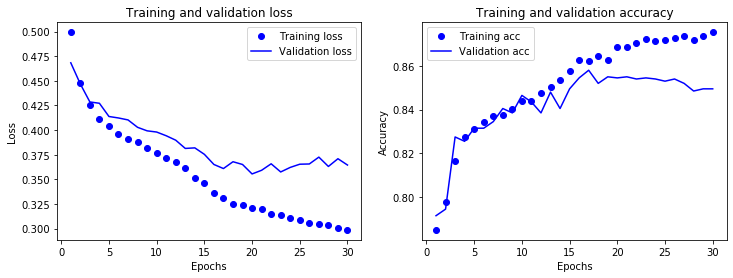

In [89]:
show_history(history)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1583
           1       0.73      0.44      0.55       417

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



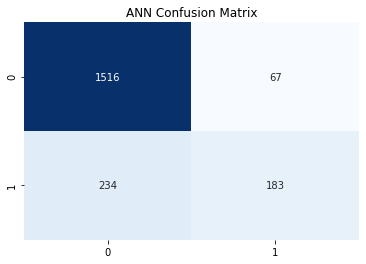

In [90]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

**添加Dropout层**

In [91]:
# from keras.layers import Dropout # 导入Dropout
# ann = Sequential() # 创建一个序贯ANN模型
# ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
# ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# # 编译神经网络，指定优化器，损失函数，以及评估标准
# ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc']) 
# history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
# y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
# y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

In [92]:
from keras.layers import Dropout # 导入Dropout
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.compile(optimizer = 'adam', # 优化器
              loss = 'binary_crossentropy', #损失函数 
              metrics = ['acc']) # 评估指标
history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.5409 - acc: 0.7914 - val_loss: 0.5242 - val_acc: 0.7915
Epoch 2/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.5004 - acc: 0.7975 - val_loss: 0.5043 - val_acc: 0.7915
Epoch 3/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.4873 - acc: 0.7975 - val_loss: 0.4964 - val_acc: 0.7915
Epoch 4/30
8000/8000 [==============================] - 0s 38us/step - loss: 0.4774 - acc: 0.7975 - val_loss: 0.5016 - val_acc: 0.7915
Epoch 5/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.4655 - acc: 0.7975 - val_loss: 0.4887 - val_acc: 0.7915
Epoch 6/30
8000/8000 [==============================] - 0s 38us/step - loss: 0.4585 - acc: 0.7975 - val_loss: 0.4998 - val_acc: 0.7915
Epoch 7/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.4524 - acc: 0.7975 - val_loss: 0.4847 - val_acc: 0.7915
Epoch 8

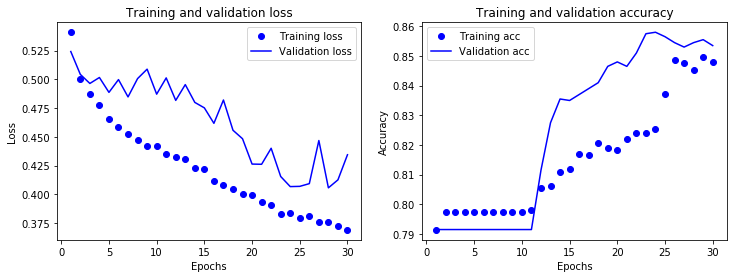

In [93]:
show_history(history)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1583
           1       0.69      0.54      0.61       417

    accuracy                           0.85      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.84      0.85      0.85      2000



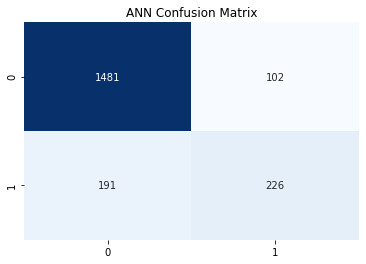

In [94]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)